In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics.pairwise import cosine_similarity

from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
## loading bthe data set
df=pd.read_csv("Songs_5000.csv")

In [3]:
## Checking the data
df.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,04-Apr,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,04-Apr,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,05-Apr,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,04-Apr,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,04-Apr,0.390


# EDA & Data Visualization

In [4]:
## checking the data type
df.shape

(6910, 18)

In [5]:
## checking for data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6910 entries, 0 to 6909
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             6910 non-null   object 
 1   artist_name       6910 non-null   object 
 2   track_name        6910 non-null   object 
 3   track_id          6910 non-null   object 
 4   popularity        6910 non-null   int64  
 5   acousticness      6910 non-null   float64
 6   danceability      6910 non-null   float64
 7   duration_ms       6910 non-null   int64  
 8   energy            6910 non-null   float64
 9   instrumentalness  6910 non-null   float64
 10  key               6910 non-null   object 
 11  liveness          6910 non-null   float64
 12  loudness          6910 non-null   float64
 13  mode              6910 non-null   object 
 14  speechiness       6910 non-null   float64
 15  tempo             6910 non-null   float64
 16  time_signature    6910 non-null   object 


In [6]:
## checking for the null value
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [7]:
## Checking the distribution of the numerical columns
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,6910.000000,6910.000000,6910.000000,6.910000e+03,6910.000000,6910.000000,6910.000000,6910.000000,6910.000000,6910.000000,6910.000000
mean,45.071201,0.357149,0.572596,2.367553e+05,0.575908,0.118914,0.201696,-9.166273,0.117064,118.469559,0.474011
std,22.606410,0.351980,0.179041,1.339751e+05,0.259215,0.274881,0.179394,5.774939,0.170061,30.917615,0.252643
min,0.000000,0.000002,0.059600,2.166700e+04,0.000267,0.000000,0.013000,-47.046000,0.023000,32.244000,0.025100
25%,29.000000,0.032000,0.460000,1.842160e+05,0.398000,0.000000,0.098100,-11.093250,0.036600,94.004500,0.270000
50%,50.000000,0.218000,0.583500,2.193900e+05,0.606000,0.000019,0.126500,-7.533000,0.051300,116.878000,0.468000
75%,63.000000,0.694000,0.705000,2.605100e+05,0.787000,0.010200,0.241000,-5.411000,0.110000,139.880250,0.671000
max,91.000000,0.996000,0.965000,3.631469e+06,0.998000,0.997000,1.000000,0.491000,0.963000,220.041000,1.000000


In [8]:
df=df.rename(columns={'track_name':'Song_name',})

In [9]:
df.head()

,genre,artist_name,Song_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,04-Apr,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,04-Apr,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,05-Apr,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,04-Apr,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,04-Apr,0.390


In [10]:
df1=df.drop(['key','time_signature'],axis=1)

In [11]:
df1.head()

,genre,artist_name,Song_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,Major,0.0525,166.969,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,Minor,0.0868,174.003,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,Minor,0.0362,99.488,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,Major,0.0395,171.758,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,Major,0.0456,140.576,0.390


In [12]:
## Dropping this duplicate
df1.duplicated(subset=['artist_name','Song_name'],keep='last').sum()
df2=df1.drop_duplicates(subset=['artist_name','Song_name'],keep='last')

In [13]:
df2.shape

(6807, 16)

In [14]:
## checking for the genere
df2['genre'].value_counts()

Folk                643
Hip-Hop             626
Alternative         567
Anime               437
Country             415
Movie               386
Classical           382
Dance               328
Blues               325
R&B                 310
Reggae              294
Electronic          284
Ska                 269
Reggaeton           218
Jazz                197
Comedy              188
Children's Music    165
Rap                 138
Rock                124
Pop                 121
A Capella           119
Opera               111
Soul                 86
Indie                74
Name: genre, dtype: int64

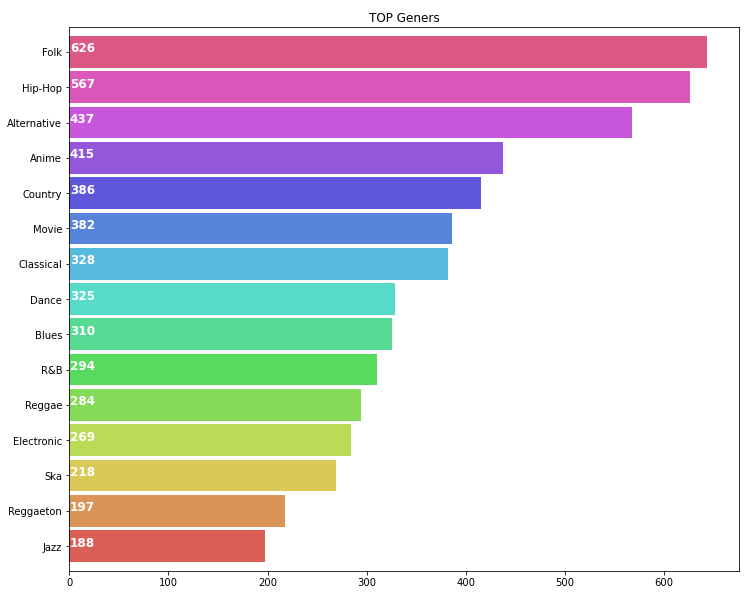

In [15]:
## Top 15 geners
plt.subplots(figsize=(12,10))
a=[]
for i in df2['genre']:
    a.append(i)
am=pd.Series(a).value_counts()[0:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',15))
for i,v in enumerate(pd.Series(a).value_counts()[0:16].sort_values(ascending=True).values):
     am.text(.8,i,v,fontsize=12,color='white',weight='bold')
plt.title("TOP Geners")
plt.show()

### From above observation we can said that the comedy and soundtrsck have more numbers of song as comapre to the others genere.
### Soul and world genere have shows less song counts.

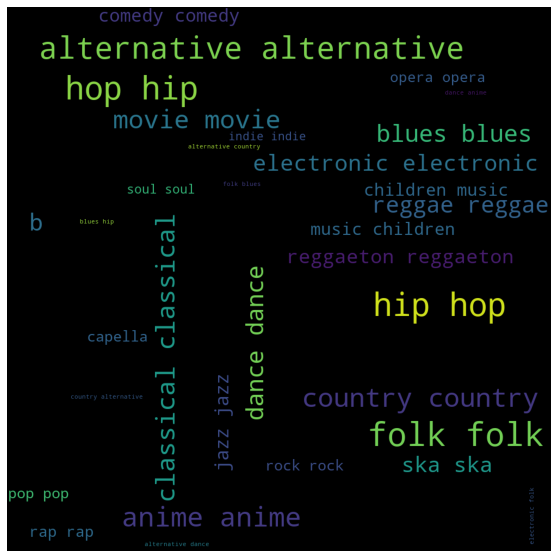

In [16]:
## checking for the duplicates
plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
word=[]
for i in df2['genre']:
    word.append(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [17]:
## checking for the artists name
df1['artist_name'].value_counts()

Chorus             99
Henri Salvador     83
Enzo Garcia        79
Johannes Brahms    59
Nobuo Uematsu      48
                   ..
Khea                1
Valee               1
Fugees              1
YFN Lucci           1
Bay Ledges          1
Name: artist_name, Length: 2758, dtype: int64

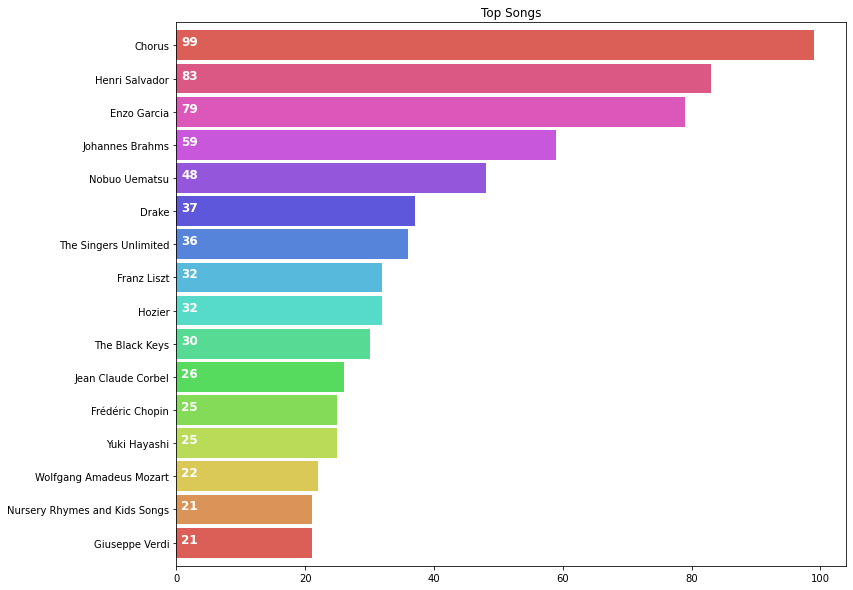

In [18]:
## Top 15 artists name
plt.subplots(figsize=(12,10))
A=[]
for i in df2['artist_name']:
    A.append(i)
ab=pd.Series(A).value_counts()[0:16].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',15))
for i,v in enumerate(pd.Series(A).value_counts()[:16].sort_values(ascending=True).values):
    ab.text(.8,i,v,fontsize=12,color='white',weight='bold')
plt.title('Top Songs')
plt.show()

### From above observation show that giuesepe verdi and giacomo puccini have large number of songs than other artist.while Howard shore Drake have less song counts


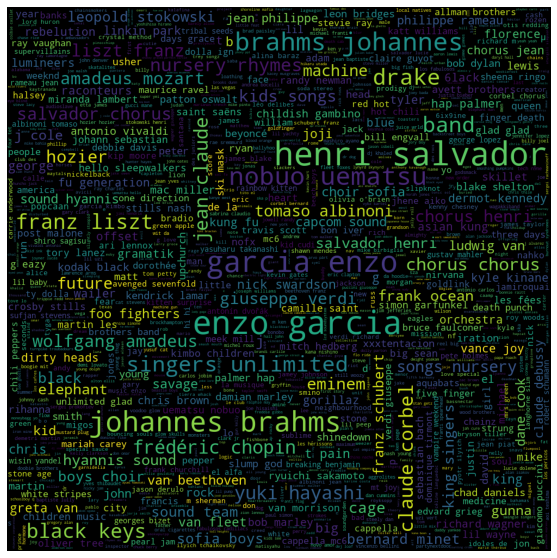

In [19]:
plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
word=[]
for i in df2['artist_name']:
    word.append(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [20]:
## Checking the distribution of the numerical columns
df2.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,6807.000000,6807.000000,6807.000000,6.807000e+03,6807.000000,6807.000000,6807.000000,6807.000000,6807.000000,6807.000000,6807.000000
mean,44.726164,0.358255,0.571595,2.369105e+05,0.575890,0.120366,0.202209,-9.191074,0.117344,118.474344,0.474466
std,22.583809,0.352731,0.179360,1.348377e+05,0.260221,0.276432,0.180134,5.805315,0.170959,30.937708,0.253087
min,0.000000,0.000002,0.059600,2.166700e+04,0.000267,0.000000,0.013000,-47.046000,0.023000,32.244000,0.025100
25%,29.000000,0.031950,0.459000,1.840085e+05,0.397500,0.000000,0.098000,-11.132000,0.036550,93.998500,0.270000
50%,50.000000,0.218000,0.582000,2.193330e+05,0.606000,0.000019,0.127000,-7.540000,0.051300,116.904000,0.469000
75%,63.000000,0.697500,0.704500,2.605400e+05,0.788000,0.010900,0.242000,-5.414000,0.110000,139.883500,0.672000
max,91.000000,0.996000,0.965000,3.631469e+06,0.998000,0.997000,1.000000,0.491000,0.963000,220.041000,1.000000


## From above observation we can clearly conclude that 
## 1) Energy and valence are more related it means the eneriged songs are more positive
## 2)Danacability and valance also shows same relation.
## 3)Enerized song are also more loud and dancing songs have more time duration.

   ## Let's Explore further data

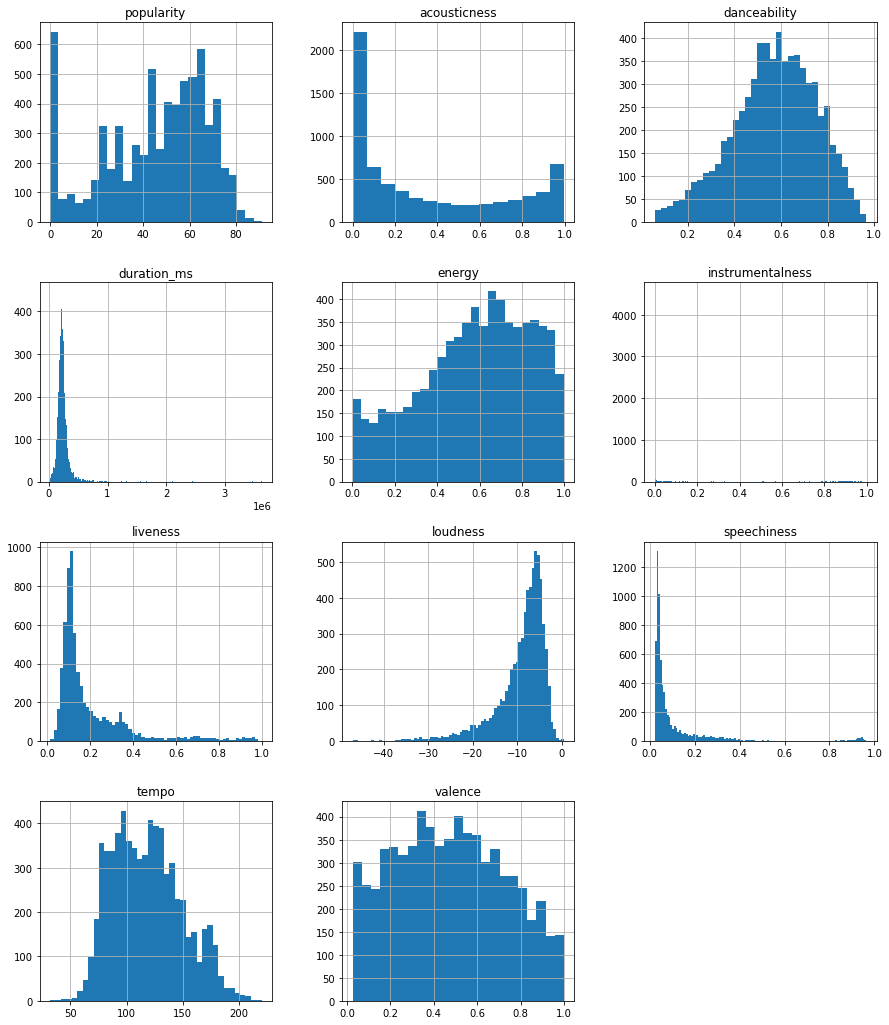

In [21]:
## Let's explore the distribution of the data using visualization
df2.hist(figsize=(15,18),bins='auto');

## From above observation Tempo,popularity,accoustiness,dancability,valence are looking normally distributed but we need to further investigate outliers using boxplots.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Promises (with Sam Smith)'),
  Text(1, 0, 'Te Vi'),
  Text(2, 0, 'Un Año'),
  Text(3, 0, 'BEBE (feat. Anuel Aa)'),
  Text(4, 0, 'MALA (feat. Anuel Aa)'),
  Text(5, 0, 'Amigos Con Derechos'),
  Text(6, 0, 'Starboy'),
  Text(7, 0, "'Till I Collapse"),
  Text(8, 0, 'Unforgettable'),
  Text(9, 0, 'Power Over Me'),
  Text(10, 0, 'No Brainer'),
  Text(11, 0, 'Mala Mía'),
  Text(12, 0, 'Aullando'),
  Text(13, 0, 'Dusk Till Dawn - Radio Edit'),
  Text(14, 0, 'Me Rehúso'),
  Text(15, 0, 'Million Reasons'),
  Text(16, 0, 'Girls Have Fun (feat. G-Eazy & Rich The Kid)'),
  Text(17, 0, 'Sanctuary'),
  Text(18, 0, 'High On Life (feat. Bonn)'),
  Text(19, 0, 'Hotel California - Eagles 2013 Remaster')])

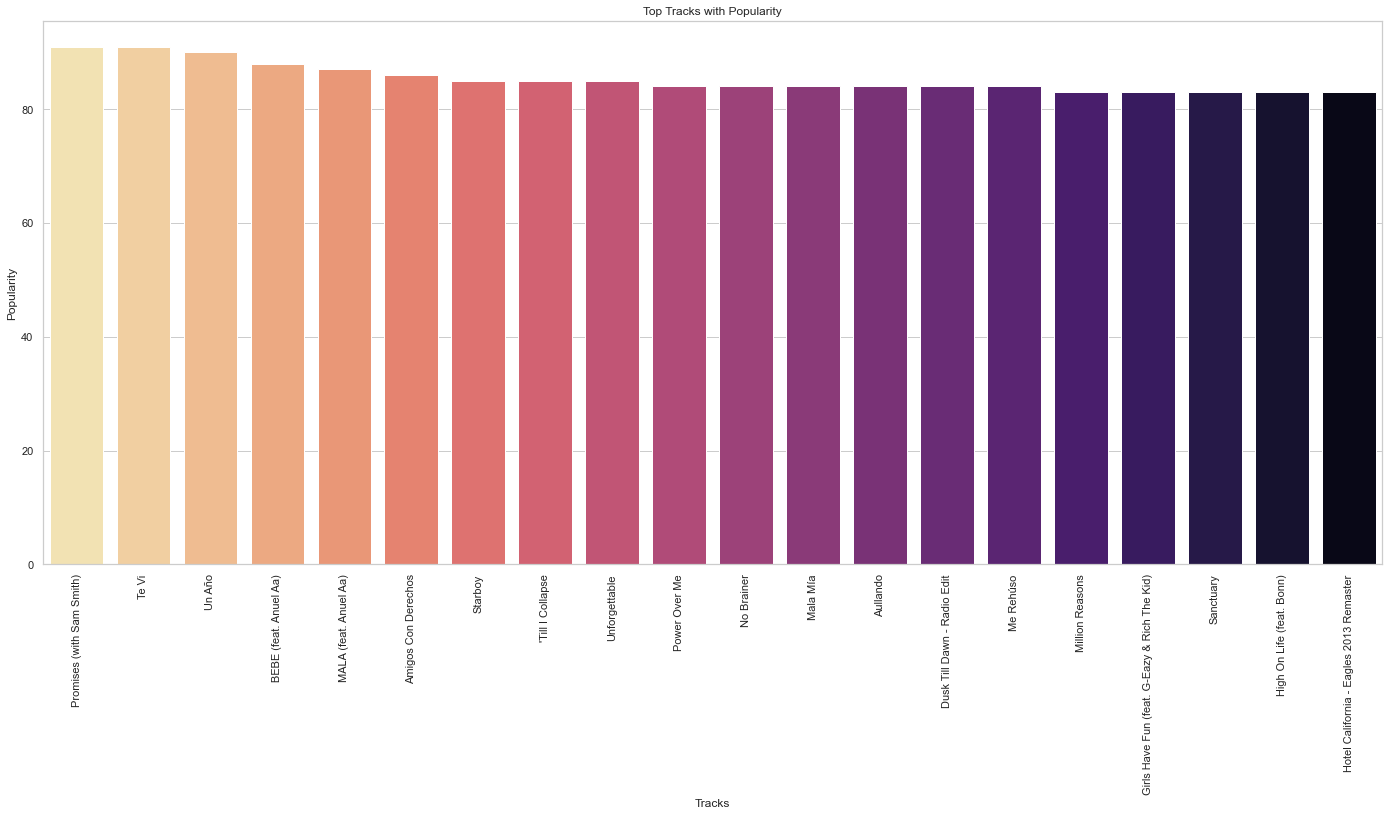

In [22]:
## Top 20 songs with popularity
plt.figure(figsize=(24, 10))
sns.set(style="whitegrid")
x = df2.groupby("Song_name")["popularity"].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(x.index, x, palette='magma_r')
axis.set_title('Top Tracks with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

### From above observation we conclude that song name Promises (with Sam Smith)  is most poular song with the popularity of 100,followed by the song Te Vi with the popularity 98.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Piso 21'),
  Text(1, 0, 'Sebastian Yatra'),
  Text(2, 0, 'French Montana'),
  Text(3, 0, 'Danny Ocean'),
  Text(4, 0, 'Martin Garrix'),
  Text(5, 0, 'Zac Efron'),
  Text(6, 0, 'Rvssian'),
  Text(7, 0, 'Mark Ronson'),
  Text(8, 0, 'Macklemore & Ryan Lewis'),
  Text(9, 0, '6ix9ine'),
  Text(10, 0, 'Twenty One Pilots'),
  Text(11, 0, 'NSG'),
  Text(12, 0, 'Seeb'),
  Text(13, 0, 'A$AP Ferg'),
  Text(14, 0, 'The Fray'),
  Text(15, 0, 'Ed Sheeran'),
  Text(16, 0, 'Lukas Graham'),
  Text(17, 0, 'Macklemore'),
  Text(18, 0, 'Grupo Arranke'),
  Text(19, 0, 'Rex Orange County')])

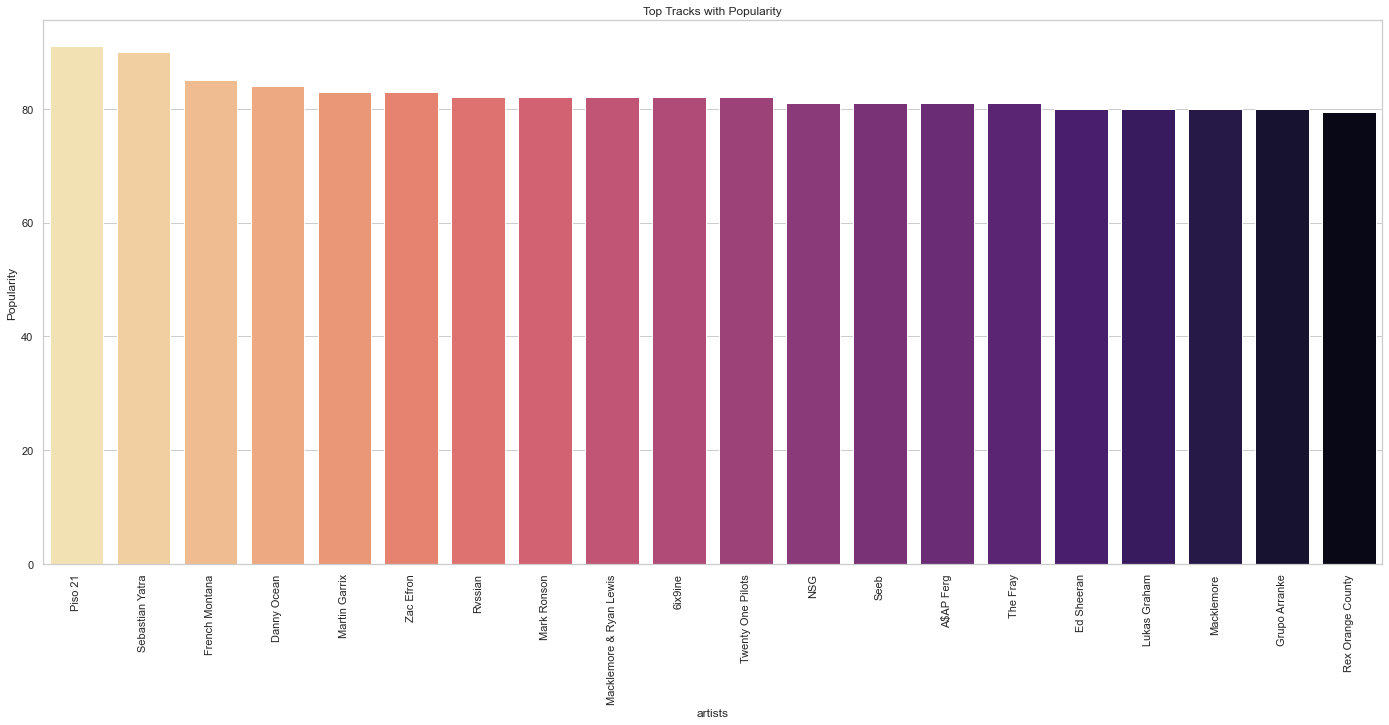

In [23]:
## Top 20 artists with popularity
plt.figure(figsize=(24, 10))
sns.set(style="whitegrid")
x = df2.groupby("artist_name")["popularity"].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(x.index, x, palette='magma_r')
axis.set_title('Top Tracks with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('artists')
plt.xticks(rotation = 90)

### From above observation we conclude that the artists name Piso 21 and Sebastian Yatra have more popular song with 85 popularity.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Hot In Herre'),
  Text(1, 0, 'Shake That'),
  Text(2, 0, 'So High - Acoustic'),
  Text(3, 0, 'Every Season'),
  Text(4, 0, 'Antes de Dormir'),
  Text(5, 0, 'Lick'),
  Text(6, 0, 'BLACKJACK (feat. YBN Cordae) - Remix'),
  Text(7, 0, 'Frostbite (Remix) (feat. Offset & Rich The Kid)'),
  Text(8, 0, 'Only in the West'),
  Text(9, 0, 'Still Think About You'),
  Text(10, 0, 'Drogba (Joanna) - WizKid Remix'),
  Text(11, 0, 'Me Superé'),
  Text(12, 0, 'Catch Me Outside'),
  Text(13, 0, 'No Flockin'),
  Text(14, 0, 'Flood Watch'),
  Text(15, 0, 'Pretty Ugly'),
  Text(16, 0, 'Caroline'),
  Text(17, 0, 'Cash War'),
  Text(18, 0, 'Identity Theft'),
  Text(19, 0, 'Movin’ Up')])

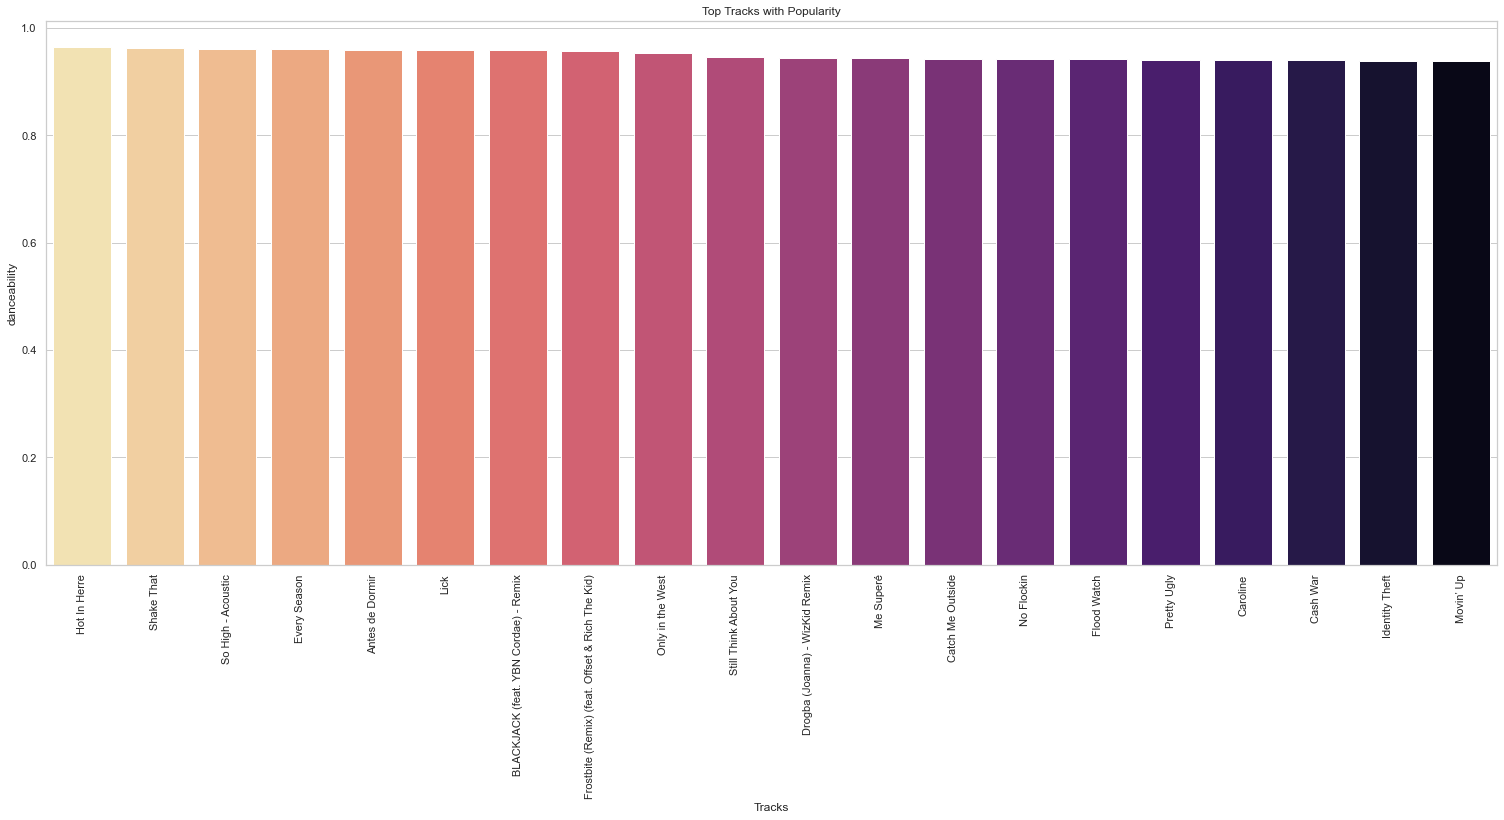

In [24]:
## Top 20 songs by energy
plt.figure(figsize=(26, 10))
sns.set(style="whitegrid")
x = df2.groupby("Song_name")["danceability"].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(x.index, x, palette='magma_r')
axis.set_title('Top Tracks with Popularity')
axis.set_ylabel('danceability')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

### From above observation we conclude that the  song name Hot In Herre and Shake That have more enerigzed song with energy index 1.

False


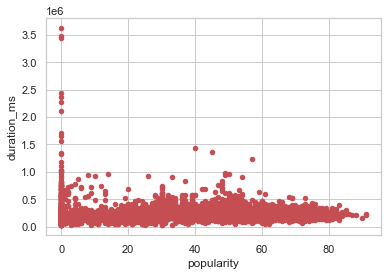

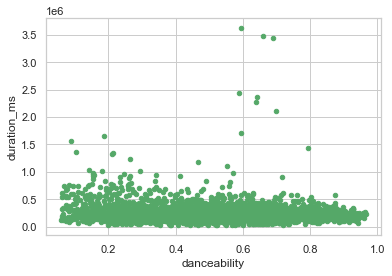

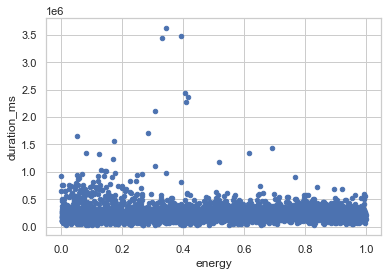

In [25]:
ax1 = df2.plot(kind='scatter', x='popularity', y='duration_ms', color='r')    
ax2 = df2.plot(kind='scatter', x='danceability', y='duration_ms', color='g')    
ax3 = df2.plot(kind='scatter', x='energy', y='duration_ms', color='b')

print(ax1 == ax2 == ax3)  # True

## Not much but yes! some song shows linear relationship with duration. specially energy songs shows strong relation

# MODEL BUILDING

## First we build model using cosine similarity score.

# COSINE SIMILARITY

### Data preparation.

In [26]:
## For similarity based model we only choosed catagorical columns i.e geners and artist name
df3=df2[['genre','artist_name','Song_name','track_id']]
df3.head()

,genre,artist_name,Song_name,track_id
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK


In [27]:
df3.shape

(6807, 4)

In [28]:
## Cleaning of the text
df3['artist_name']=df3['artist_name'].apply(lambda x:x.replace('&',''))
df3['artist_name']=df3['artist_name'].apply(lambda x:x.replace('-',''))
df3['artist_name']=df3['artist_name'].apply(lambda x:x.replace('"',''))
df3['artist_name']=df3['artist_name'].apply(lambda x:x.replace('.',''))
df3['artist_name']=df3['artist_name'].apply(lambda x:x.replace('+',''))
df3['Song_name']=df3['Song_name'].apply(lambda x:x.replace("'",""))

In [29]:
df3.head()

,genre,artist_name,Song_name,track_id
0,Movie,Henri Salvador,Cest beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV
1,Movie,Martin les fées,Perdu davance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP
2,Movie,Joseph Williams,Dont Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK


In [30]:
## Now convert text into lower case
df3['artist_name']=df3['artist_name'].apply(lambda x:x.lower())
df3['genre']=df3['genre'].apply(lambda x:x.lower())
df3.head()

,genre,artist_name,Song_name,track_id
0,movie,henri salvador,Cest beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV
1,movie,martin les fées,Perdu davance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP
2,movie,joseph williams,Dont Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy
3,movie,henri salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf
4,movie,fabien nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK


In [31]:
## Converting text into list 
df3['genre']=df3['genre'].apply(lambda x:x.split())
df3['artist_name']=df3['artist_name'].apply(lambda x:x.split())
df3.head()

,genre,artist_name,Song_name,track_id
0,[movie],"[henri, salvador]",Cest beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV
1,[movie],"[martin, les, fées]",Perdu davance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP
2,[movie],"[joseph, williams]",Dont Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy
3,[movie],"[henri, salvador]",Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf
4,[movie],"[fabien, nataf]",Ouverture,0IuslXpMROHdEPvSl1fTQK


####  we created Tags columns with the additon of genere and artist_name

In [32]:
df3['Tags']=df3['genre']+df3['artist_name']
df3.head()

,genre,artist_name,Song_name,track_id,Tags
0,[movie],"[henri, salvador]",Cest beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,"[movie, henri, salvador]"
1,[movie],"[martin, les, fées]",Perdu davance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,"[movie, martin, les, fées]"
2,[movie],"[joseph, williams]",Dont Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,"[movie, joseph, williams]"
3,[movie],"[henri, salvador]",Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,"[movie, henri, salvador]"
4,[movie],"[fabien, nataf]",Ouverture,0IuslXpMROHdEPvSl1fTQK,"[movie, fabien, nataf]"


In [33]:
## Converting list into string
df3['Tags']=df3['Tags'].apply(lambda x:" ".join(x))
df3.head()

,genre,artist_name,Song_name,track_id,Tags
0,[movie],"[henri, salvador]",Cest beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,movie henri salvador
1,[movie],"[martin, les, fées]",Perdu davance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,movie martin les fées
2,[movie],"[joseph, williams]",Dont Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,movie joseph williams
3,[movie],"[henri, salvador]",Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,movie henri salvador
4,[movie],"[fabien, nataf]",Ouverture,0IuslXpMROHdEPvSl1fTQK,movie fabien nataf


In [34]:
df3.head()

,genre,artist_name,Song_name,track_id,Tags
0,[movie],"[henri, salvador]",Cest beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,movie henri salvador
1,[movie],"[martin, les, fées]",Perdu davance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,movie martin les fées
2,[movie],"[joseph, williams]",Dont Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,movie joseph williams
3,[movie],"[henri, salvador]",Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,movie henri salvador
4,[movie],"[fabien, nataf]",Ouverture,0IuslXpMROHdEPvSl1fTQK,movie fabien nataf


### Text Vectoraization

In [35]:
cv = CountVectorizer()
vectors = cv.fit_transform(df3['Tags'])

In [36]:
vectors.shape

(6807, 3772)

In [37]:
vectors[0]

<1x3772 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [38]:
similarity=cosine_similarity(vectors)

In [39]:
similarity.shape

(6807, 6807)

### When we caluculated the similarity score it will prodece the vectors of n * n in our case vectores shape are 6807*6807 and each vectors consisting similarity score with all song between 0 to 1. If the score is near to 1 means songs are more similar and if its near to 0 means it means the songs are diffrent.

In [40]:
song_index=df3[df3['Song_name']=='Perdu davance (par Gad Elmaleh)'].index[0]
song_index

1

In [42]:
df3.iloc[1000]

genre                       [country]
artist_name             [chase, rice]
Song_name           The Little Things
track_id       4mvEFHT5VjVfrQbnfYsHvP
Tags               country chase rice
Name: 1020, dtype: object

In [43]:
def recommend(songs):
    song_index=df3[df3['Song_name']==songs].index[0]
    distances=similarity[song_index]
    songs_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:11]
    
    for i in songs_list:
        print(df3.iloc[i[0]].Song_name)

In [45]:
result1=recommend('The Little Things')

Suffer in Peace
Chicks, Trucks, and Beer - feat. Colt Ford
2000 Miles
My Mistake
Chinese Translation
I Need You
Feels So Right
40 Hour Week (For A Livin)
Welcome to the Country
Highway Song


# Nearest neighoubr

In [46]:
df4=df2.drop(['genre','artist_name','Song_name'],axis=1)
df4.head()

,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,Major,0.0525,166.969,0.814
1,0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,Minor,0.0868,174.003,0.816
2,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,Minor,0.0362,99.488,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,Major,0.0395,171.758,0.227
4,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,Major,0.0456,140.576,0.390


In [47]:
df4['mode'].value_counts()

Major    4554
Minor    2253
Name: mode, dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [49]:
df4['mode']=le.fit_transform(df4['mode'])

In [50]:
df4.head()

,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0,0.0525,166.969,0.814
1,0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,1,0.0868,174.003,0.816
2,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,1,0.0362,99.488,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0,0.0395,171.758,0.227
4,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0,0.0456,140.576,0.390


## Nearest Neighbors with Ball Tree

In [51]:
from sklearn.neighbors import NearestNeighbors

In [52]:
df4.drop(['track_id'],axis=1,inplace=True)

In [53]:
df4.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0,0.0525,166.969,0.814
1,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,1,0.0868,174.003,0.816
2,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,1,0.0362,99.488,0.368
3,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0,0.0395,171.758,0.227
4,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0,0.0456,140.576,0.390


In [54]:
songs_Recomand = NearestNeighbors(n_neighbors=11, algorithm='ball_tree').fit(df4)

In [55]:
#Get the distances and indices: the indices to pull the recommended neighbors, and the distances for evaluation later
distances, indices = songs_Recomand.kneighbors(df4)

In [56]:
def recommend_songs(song=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(df.iloc[id]["Song_name"])
    if song:
        recommendations = []
        found_id =df[df['Song_name']==song].index[0]
        for id in indices[found_id][1:]:
            recommendations.append((df.iloc[id]["Song_name"], df.iloc[id]["artist_name"]))
            print(df.iloc[id]["Song_name"], df.iloc[id]["artist_name"])
        return recommendations

In [57]:
results2 = recommend_songs("The Little Things")

Bartender T-Pain
Turn Blue The Black Keys
Don't Lose Me Offset
Creep TLC
Lil Pump Lil Pump
From the Window Rebelution
Smother Daughter
Pray (feat. A$AP Ferg) Smokepurpp
Decision Goldfinger
Gun Control - GH Version Chris Rock


## Nearest Neighbors with KD Tree

In [58]:
songs_nn2 = NearestNeighbors(n_neighbors=11, algorithm='kd_tree', leaf_size = 40, metric = 'euclidean').fit(df4)

In [59]:
distances2, indices2 = songs_nn2.kneighbors(df4)

In [60]:
def recommend_songs_2(song=None,id=None):
    if id:
        for id in indices2[id][1:]:
            print(df.iloc[id]["Song_name"])
    if song:
        recommendations = []
        found_id =df[df['Song_name']==song].index[0]
        for id in indices2[found_id][1:]:
            recommendations.append((df.iloc[id]["Song_name"], df.iloc[id]["artist_name"]))
            print(df.iloc[id]["Song_name"], df.iloc[id]["artist_name"])
        return recommendations

In [61]:
results3 = recommend_songs_2("The Little Things")

Bartender T-Pain
Turn Blue The Black Keys
Don't Lose Me Offset
Creep TLC
Lil Pump Lil Pump
From the Window Rebelution
Smother Daughter
Pray (feat. A$AP Ferg) Smokepurpp
Decision Goldfinger
Gun Control - GH Version Chris Rock


# K-Means

In [62]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10, ))])
X = df4.select_dtypes(np.number)
cluster_pipeline.fit(X)
df4['cluster'] = cluster_pipeline.predict(X)

In [63]:
df4 = df4.drop(columns=['duration_ms','popularity'])

In [64]:
songs_nn3 = NearestNeighbors(n_neighbors=11, algorithm='kd_tree', leaf_size = 40, metric = 'euclidean').fit(df4)

In [65]:
distances3, indices3 = songs_nn3.kneighbors(df4)

In [66]:
def recommend_songs_3(song=None):
        recommendations = []
        found_id =df[df['Song_name']==song].index[0]
        for id in indices3[found_id][1:]:
            recommendations.append((df.iloc[id]["Song_name"], df.iloc[id]["artist_name"]))
            print(df.iloc[id]["Song_name"], df.iloc[id]["artist_name"])
        return recommendations

In [67]:
results4 = recommend_songs_3("The Little Things")

Everything Is Free Gillian Welch
Happy Pills Weathers
Drum Song Jackie Mittoo
The Winding Stair Mountain Blues Turnpike Troubadours
Orion's Belt Sabrina Claudio
Te Perdi Almighty
Gau's Theme Nobuo Uematsu
義風乱舞 WagakkiBand
Bend Corey Smith
The Sheltering Sky Ryuichi Sakamoto


# Model Evaluations

In [73]:
from tabulate import tabulate

In [67]:
table = [["Godrics Hollow Graveyard",'Mud on the Tires','Mud on the Tires','Prequel To The Sequel'], 
        ["Farewell to Dobby",'Shawty','Shawty','Trollmors vaggsång'], 
        ["Harrys Sacrifice",'Broken Hearted Melody','Broken Hearted Melody','When It Was Wrong'],
        ['The Danish Girl','Seven Stars','Seven Stars','Yo vengo aqui'],
        ['Snape to Malfoy Manor','Differences','Differences','Mandatory Sterilization'],
        ['At The Burrow','Whats Luv?','Whats Luv?','Signos (SEP7IMO DIA)'],
        ['Ron Leaves','Watch Me Kick','Watch Me Kick','IDOL'],
        ['The Kings Speech','Ballroom Blitz','Ballroom Blitz','Yellow Eyes'],
        ['Snapes Demise','Ma Femme','Ma Femme','Take It Slow'],
        ['Voldemorts End','Good Vibes - Dub','Good Vibes - Dub','Road Block (feat. Racquel Jones) - Thievery Remix']] 

#define column names
col_names = ["Cosine Similarity", "KNN With Ball_tree","KNN with KD_tree","K-means"]

#display table
print(tabulate(table, headers=col_names,showindex="always"))

    Cosine Similarity         KNN With Ball_tree     KNN with KD_tree       K-means
--  ------------------------  ---------------------  ---------------------  -------------------------------------------------
 0  Godrics Hollow Graveyard  Mud on the Tires       Mud on the Tires       Prequel To The Sequel
 1  Farewell to Dobby         Shawty                 Shawty                 Trollmors vaggsång
 2  Harrys Sacrifice          Broken Hearted Melody  Broken Hearted Melody  When It Was Wrong
 3  The Danish Girl           Seven Stars            Seven Stars            Yo vengo aqui
 4  Snape to Malfoy Manor     Differences            Differences            Mandatory Sterilization
 5  At The Burrow             Whats Luv?             Whats Luv?             Signos (SEP7IMO DIA)
 6  Ron Leaves                Watch Me Kick          Watch Me Kick          IDOL
 7  The Kings Speech          Ballroom Blitz         Ballroom Blitz         Yellow Eyes
 8  Snapes Demise             Ma Femme         

In [68]:
mean_distance3 = distances3.mean()

In [69]:
mean_distance3

1.4082936254782616

In [70]:
mean_distance = distances.mean()
mean_distance

1526.9147027537024

In [71]:
mean_distance2=distances2.mean()
mean_distance2

1526.9147027537024

In [75]:
Table=[['Knn with Ball_tree',1526.91],
      ['KNN with KD_tree',1526.91],
      ['K-mean',1.40]]

#define column names
col_names = ["Models",'Mean_distance_score']

#display table
print(tabulate(Table, headers=col_names,showindex="always",tablefmt="fancy_grid"))

╒════╤════════════════════╤═══════════════════════╕
│    │ Models             │   Mean_distance_score │
╞════╪════════════════════╪═══════════════════════╡
│  0 │ Knn with Ball_tree │               1526.91 │
├────┼────────────────────┼───────────────────────┤
│  1 │ KNN with KD_tree   │               1526.91 │
├────┼────────────────────┼───────────────────────┤
│  2 │ K-mean             │                  1.4  │
╘════╧════════════════════╧═══════════════════════╛


## Conclusion 

## From above result the Mean_distance_score of both knn with Ball_tree and KNN with kd_tree is large i.e 1526.91 as compare to the k-mean i.e 1.4 it means k-mean gives more similar song as comapre to others .

## While the cosimilarity model using geners is also right as it depends on genere and artist_name .

## So that we will use either cosine similarity or k-mean model for deployment.

In [76]:
import pickle

In [77]:
pickle.dump(df3.to_dict(),open('Song_dict.pkl','wb'))

In [80]:
df3.head()

,genre,artist_name,Song_name,track_id,Tags
0,[movie],"[henri, salvador]",Cest beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,movie henri salvador
1,[movie],"[martin, les, fées]",Perdu davance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,movie martin les fées
2,[movie],"[joseph, williams]",Dont Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,movie joseph williams
3,[movie],"[henri, salvador]",Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,movie henri salvador
4,[movie],"[fabien, nataf]",Ouverture,0IuslXpMROHdEPvSl1fTQK,movie fabien nataf


In [78]:
pickle.dump(similarity,open('similarity.pkl','wb'))